Project Goal:

To segment credit card customers into meaningful groups using unsupervised machine learning (K-Means and Hierarchical Clustering), in order to help a credit card company tailor its marketing strategies and product offerings for each segment.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans , AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
#load data
file_path= '/content/drive/MyDrive/cust_seg[Task 5] - cust_seg.csv'
credit_df= pd.read_csv(file_path)
credit_df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [3]:
#drop unnecessary columns
credit_df = credit_df.drop(columns= ['Customer Id'])




In [4]:
#drop Unnamed column
credit_df = credit_df.drop(columns= ['Unnamed: 0'])

In [5]:
credit_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [6]:
#check for missing values
credit_df.isnull().sum()

,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
DebtIncomeRatio,0


In [7]:
#Handle missing values in Defaulted column using fillna
credit_df['Defaulted'] = credit_df['Defaulted'].fillna(0)

In [8]:
#verify missing values
credit_df.isnull().sum()

,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,0
DebtIncomeRatio,0


Scaling the data

In [9]:
#Instantiate standard scaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(credit_df)
scaled_df = pd.DataFrame(scaled_data, columns=credit_df.columns)
scaled_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507


Determine optimal clusters
We'll use the Elbow Method to find the best number of clusters

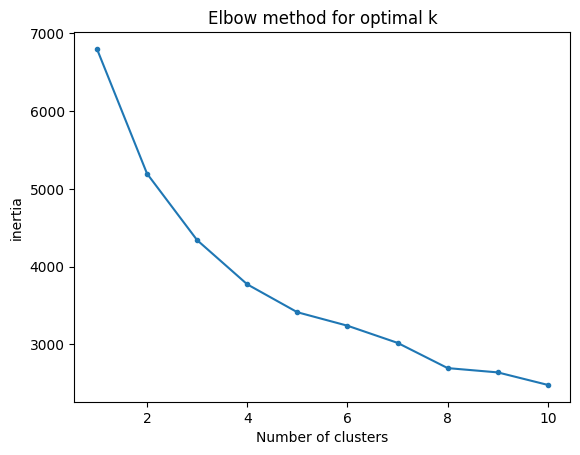

In [10]:
#Create an empty list of inertias
inertias = []

#Loop through k values between 1 and 11 and store the inertias in the list.
for k in range(1,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)

#plot elbow curve
plt.plot(range(1,11), inertias, marker = '.')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.title('Elbow method for optimal k')
plt.show()

The "elbow" occurs at k=4, meaning 4  would be the best number of clusters

In [11]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_df)
credit_df['Cluster'] = kmeans.labels_  # Assign cluster labels
kmeans.labels_

array([0, 2, 1, 0, 3, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0,
       0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 3, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2,
       3, 0, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0,
       1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 3, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2,

In [12]:
print(kmeans.inertia_)


3854.1293494687625


**Create analytical visualizations that explore statistics for each feature for each cluster.**


Cluster Distribution

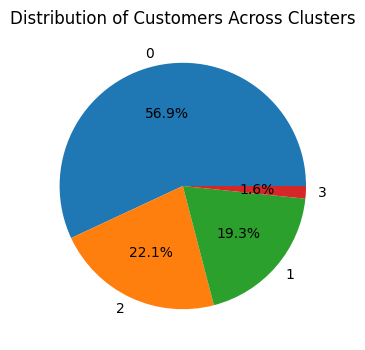

In [13]:
#piechart to show distribution of customers across clusters
plt.figure(figsize=(6, 4))
plt.pie(credit_df['Cluster'].value_counts(), labels=credit_df['Cluster'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Customers Across Clusters')
plt.show()


Shows proportion of customers in each segment e.g., Cluster 3 may be the smallest but highest-risk group.

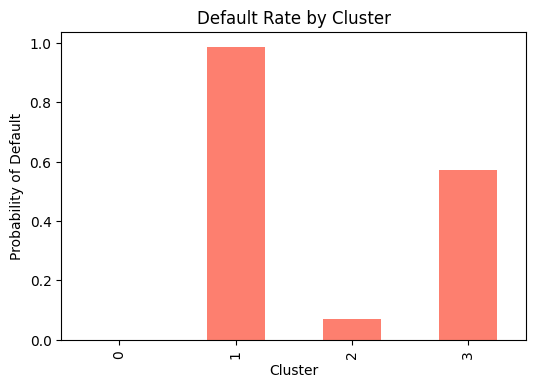

In [14]:
#default rate by cluster
plt.figure(figsize=(6, 4))
credit_df.groupby('Cluster')['Defaulted'].mean().plot.bar(color='#fd7f6f')
plt.title('Default Rate by Cluster')
plt.ylabel('Probability of Default')
plt.show()

Cluster 1 has a higher default rate vs Clusters 2 & 3.

Education level distribution

<Figure size 600x400 with 0 Axes>

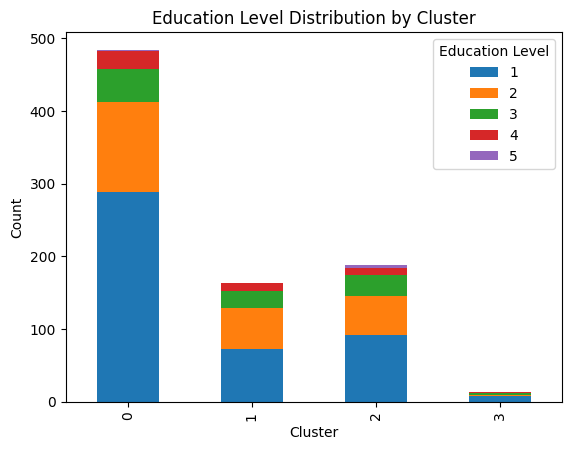

In [15]:
plt.figure(figsize=(6, 4))
pd.crosstab(credit_df['Cluster'], credit_df['Edu']).plot.bar(stacked=True)
plt.title('Education Level Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Education Level')
plt.show()

Cluster 2(Affluent) has more high-educated members



**Multivariate Relationships (Scatter & Pair Plots)**

Income vs. Age (Colored by Cluster)

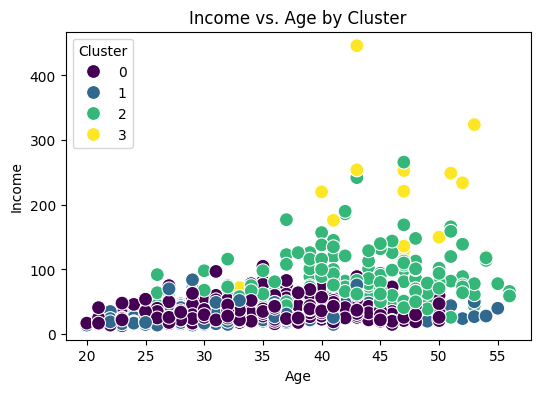

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Income', hue='Cluster', data=credit_df, palette='viridis', s=100)
plt.title('Income vs. Age by Cluster')
plt.show()

Clusters separate clearly—young/low-income (Cluster 3) vs. older/high-income (Cluster 2).

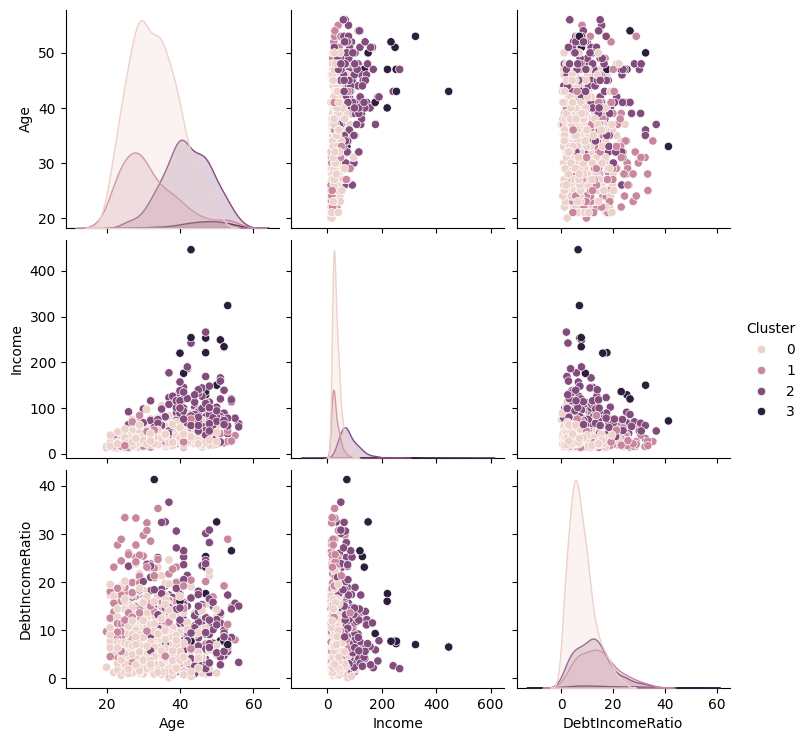

In [17]:

#pairplot of key features
sns.pairplot(credit_df, hue='Cluster', vars=['Age', 'Income', 'DebtIncomeRatio'])
plt.show()



Reveals correlations like:

High income → Higher card debt (Cluster 2)

Low income → High debt ratio (Cluster 3)

**RECOMMENDATIONS FOR STAKEHOLDERS**

1. Use specific campaigns for different clusters for example : Cluster 0, 3 -Use emotionally resonant messaging like "Your financial resilience inspires us—earn 3% cashback on groceries" . This approach balances risk management .

2. For Clusters 1,2 - Highlight exclusivity for example : Elite Cards with Concierge Services or premium travel as these customers proritize convenience and such services align with their lifestyle.

**GENERATE ANOTHER SET OF SEGMENTS USING HIERACHICAL CLUSTERING**

In [18]:
from scipy.cluster.hierarchy import dendrogram , linkage

In [19]:
#Scale the data and exclude Kmeans labels
scaler = StandardScaler()
scaled_data = scaler.fit_transform(credit_df)
scaled_df = pd.DataFrame(scaled_data, columns=credit_df.columns)
scaled_df = scaled_df.drop(columns=['Cluster'])




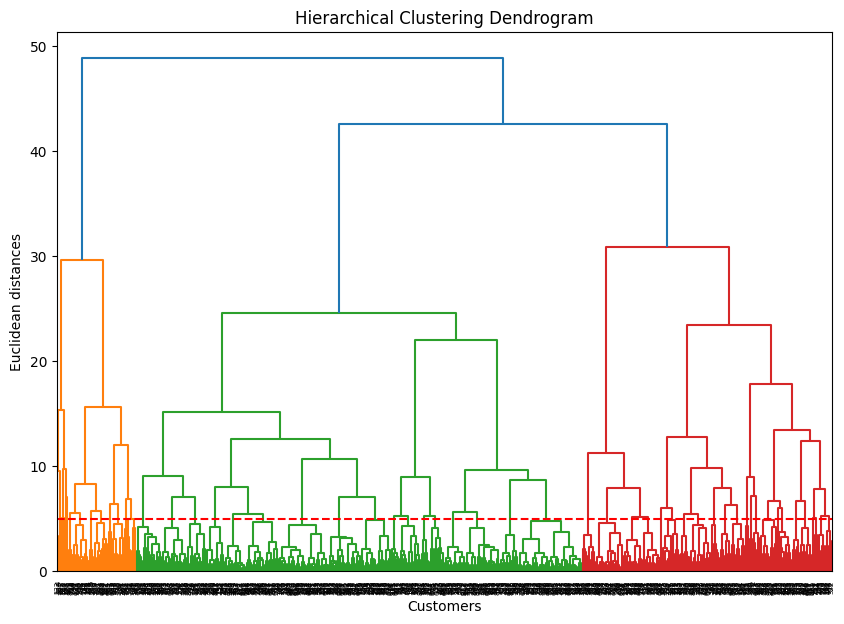

In [20]:
#Generate Dendogram
plt.figure(figsize=(10, 7))
dend= dendrogram(linkage(scaled_df, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=5, color='r', linestyle='--') #suggested cut off for 5 clusters
plt.show()



The red line at distance=5 , suggests 5 natural clusters based on vertical gap length.

In [21]:
#Apply hierachical clustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
credit_df['Hierarchical_Cluster'] = hc.fit_predict(scaled_df)

**Visualize and describe these clusters.**

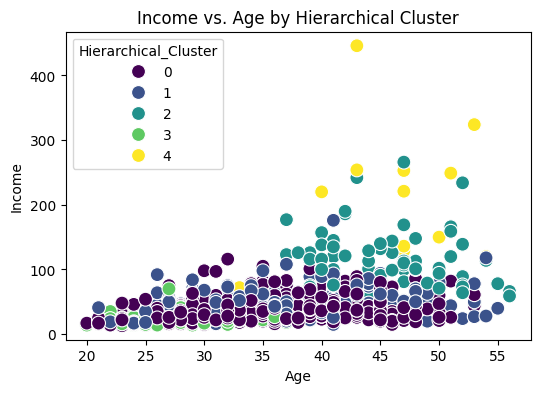

In [22]:
#Income Vs age scatterplot
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Income', hue='Hierarchical_Cluster', data=credit_df, palette='viridis', s=100)
plt.title('Income vs. Age by Hierarchical Cluster')
plt.show()

Clear separation of the new Cluster 4 (very young, very low income , higest risk).
Cluster 3 - Middle Age
Cluster 2 (Affluent Older) → Similar to K-Means Cluster 2

Cluster 0 (High-Income Professionals) → Similar to K-Means Cluster 1

Cluster 1 (Working Young Adults) → Hybrid of K-Means Clusters 0/3

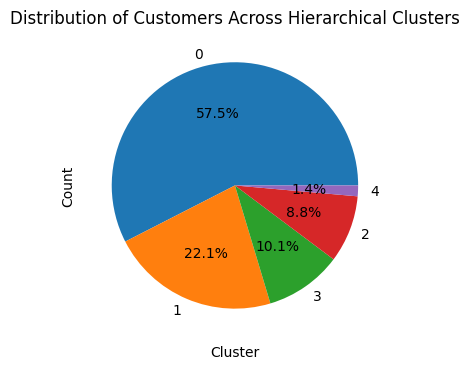

In [23]:
#Cluster distribution bar plot
plt.figure(figsize=(6, 4))
plt.pie(credit_df['Hierarchical_Cluster'].value_counts(), labels=credit_df['Hierarchical_Cluster'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Customers Across Hierarchical Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

Cluster 0 (High-Income Professionals) is largest, while Cluster 4 (Struggling Students) is smallest but highest-risk.

Actionable Insights from Visuals
Cluster 4 (Students) needs radically different products than K-Means suggested—consider student-specific cards with tuition cashback.

Cluster 3 (Mid-Life) was hidden in K-Means—ideal for "sandwich generation" cards (eldercare/kids benefits).

Dendrogram confirms 5 clusters are statistically justified (no forced groupings).

**Cluster Performance Comparison: Hierarchical vs. K-Means**

In [24]:
#Calculate Silhouette scores

#Kmeans 4 clusters
kmeans_score = silhouette_score(scaled_data, credit_df['Cluster'])
print(f"K-Means Silhouette Score: {kmeans_score:.3f}")

#Hierachical 5 clusters
hierarchical_score = silhouette_score(scaled_data, credit_df['Hierarchical_Cluster'])
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_score:.3f}")


K-Means Silhouette Score: 0.344
Hierarchical Clustering Silhouette Score: 0.244


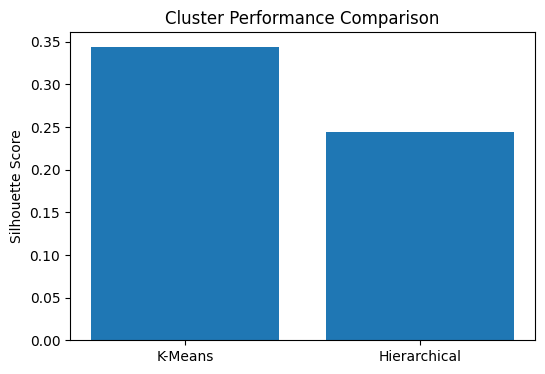

In [25]:
#visualize the comparison
plt.figure(figsize=(6, 4))
plt.bar(['K-Means', 'Hierarchical'], [kmeans_score, hierarchical_score])
plt.ylabel('Silhouette Score')
plt.title('Cluster Performance Comparison')
plt.show()

Kmeans outperforms Hierarchical in this case .
Therefore , For product strategy: Use K-Means as primary segmentation (cleaner groups).

For risk analysis: Leverage hierarchical sub-clusters as it  gives more insight into the data relationships.